Real X [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.909090

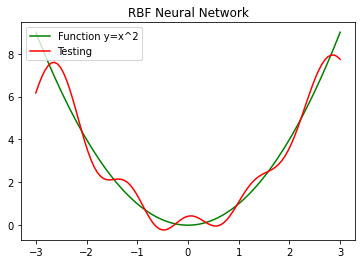

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.linalg as la


class RBF(object):
  def __init__(self,layer,radius=1.0):
    self.layer=layer
    self.radius=radius
    self.centers=None
    self.weight=None
  
  def RFB_activation(self,center,datas):
    return np.exp((-self.radius)*(la.norm(center-datas)**2))

  def create_matrix(self,X):
    matrix = np.zeros((len(X), self.layer))
    for data_arg, data_point in enumerate(X):
      for center_arg, center in enumerate(self.centers):
        matrix[data_arg, center_arg] = self.RFB_activation(center, data_point)
    return matrix

  def RandomCenter(self, X):
    random = np.random.choice(len(X), self.layer)
    centers = X[random]
    return centers

  def fit(self, X, Y):
    self.centers = self.RandomCenter(X)
    G = self.create_matrix(X)
    #here we calculate inverse matrix using pinv
    self.weight = np.dot(la.pinv(G), Y)

  def test(self, X):
    G = self.create_matrix(X)
    predictions = np.dot(G, self.weight)
    return predictions


# f = open("dataset4.txt", "w")

# def generate_data(x):
#   for i in x:
#     print("i is:",i)
#     res=i**2
#     # print('res',res)
#     f.write(str(res))
#     # print(str(res))
#     f.write("\n")


#   # x=np.random.randn()
# xrand=np.random.rand(100)
# print('random number is',xrand)
# x=[i**2 for i in xrand]
# print('square',x)

# yrand=np.random.rand(100)
# print('random number is',yrand)
# y=[i**2 for i in yrand]
# print('squarey',y)

x = np.linspace(-3, 3, 100)
y = np.power(x,2)

model = RBF(layer=10,radius=1.)
model.fit(x, y)
y_pred = model.test(x)
print("Real X {}  , Real y {}".format(x,y))
print("Real X {}  , Predicted y {}".format(x,y_pred))

plt.plot(x, y, 'g-', label='Function y=x^2')
plt.plot(x, y_pred, 'r-', label='Testing')
plt.legend(loc='upper left')
plt.title('RBF Neural Network')
plt.show()
